In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns

In [4]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
df.shape

(167, 10)

In [12]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Explanatory Data Analysis

In [13]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [14]:
numerical_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

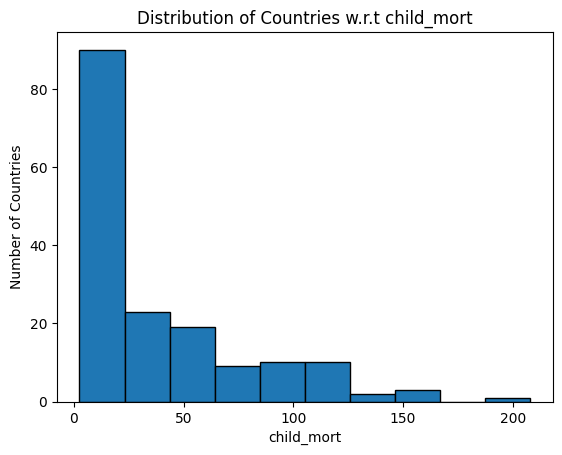

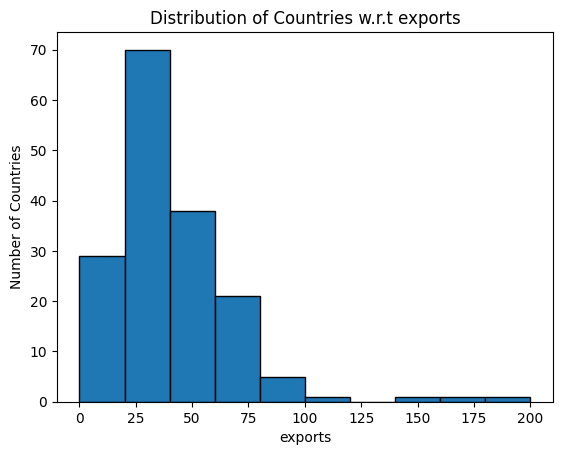

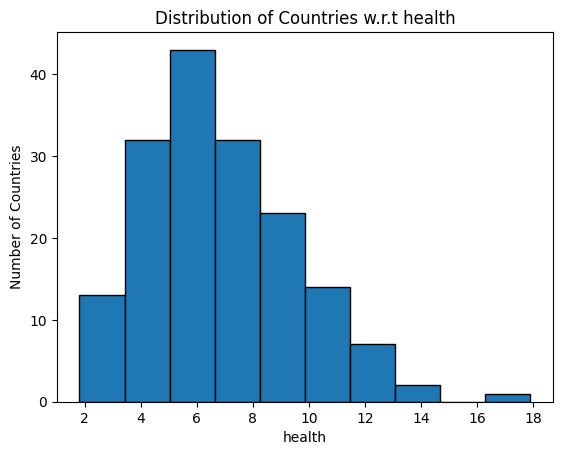

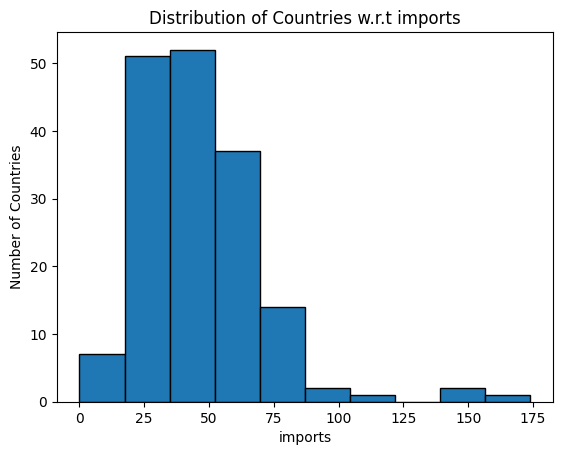

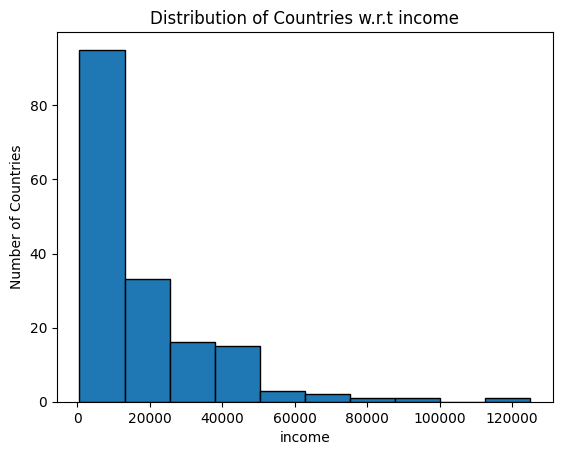

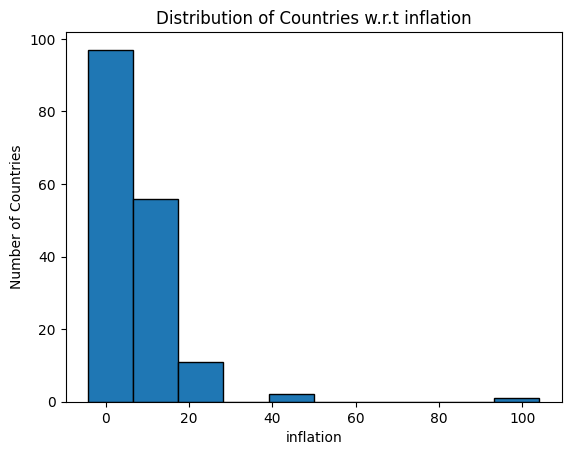

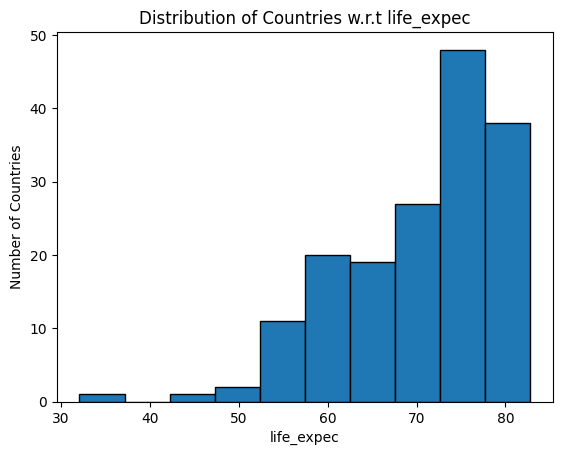

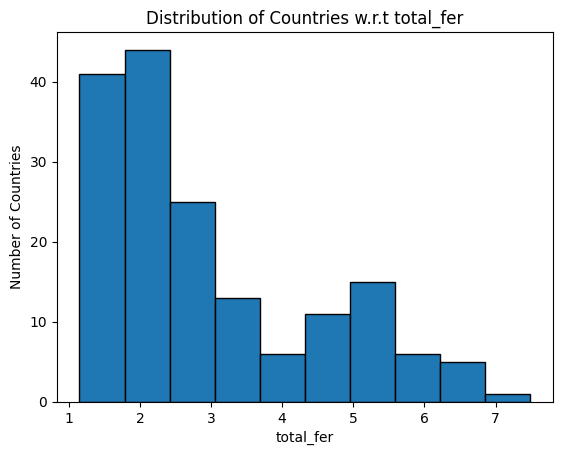

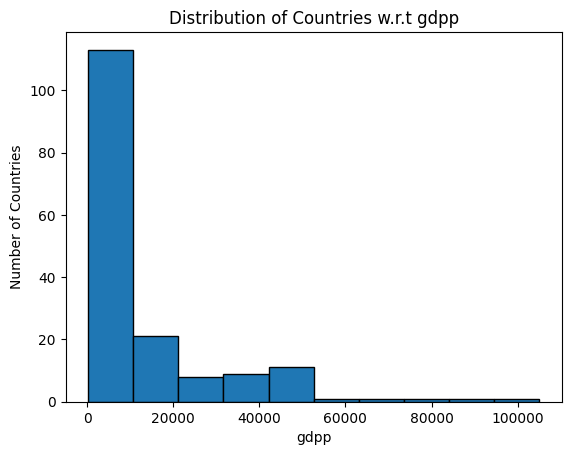

In [22]:
for i in numerical_cols:
    plt.hist(df[i], edgecolor = 'black')
    plt.xlabel(i)
    plt.ylabel('Number of Countries')
    plt.title(f'Distribution of Countries w.r.t {i}')
    
    
    plt.show()

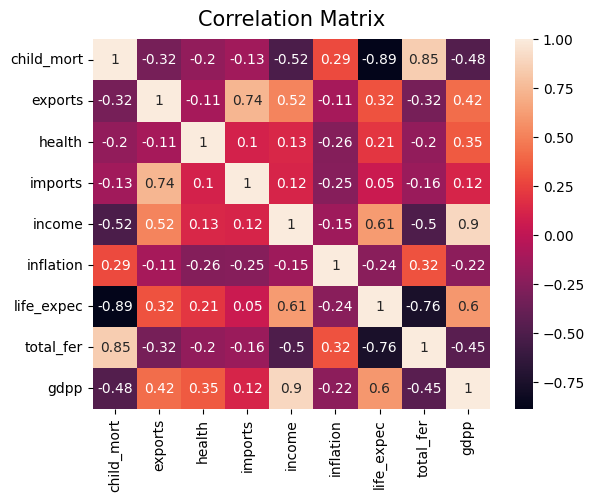

In [41]:
corr_mat = df[numerical_cols].corr().round(2)
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix', pad = 10, size = 15)
plt.show()

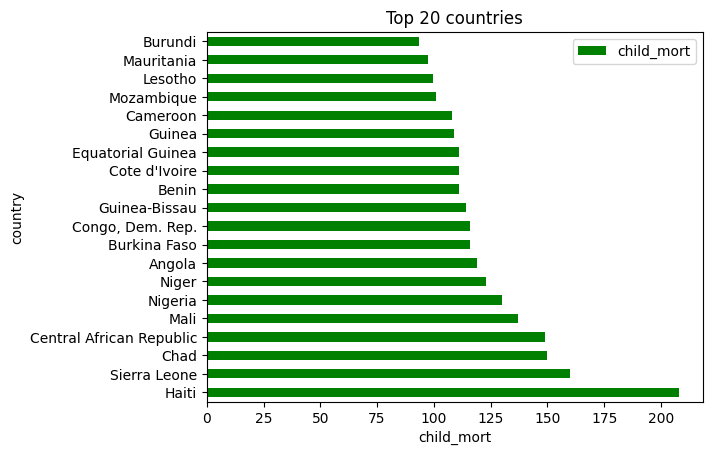

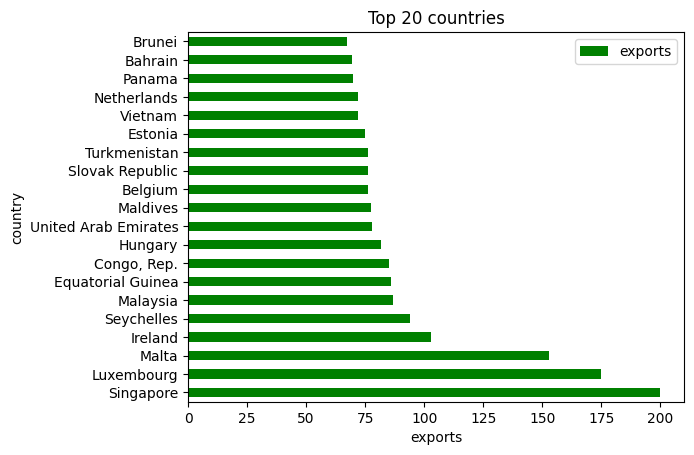

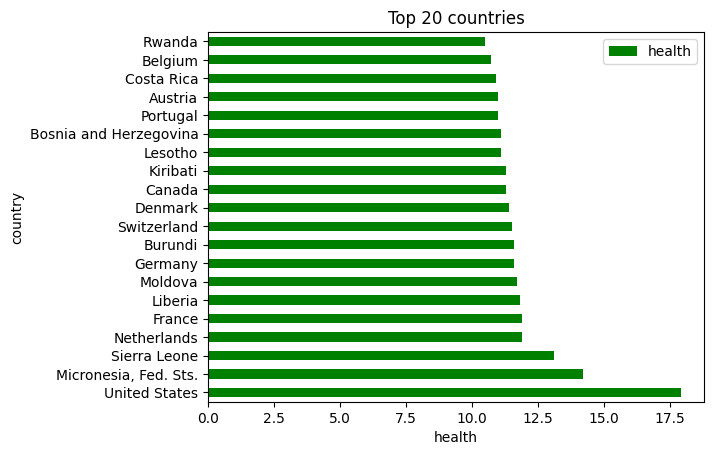

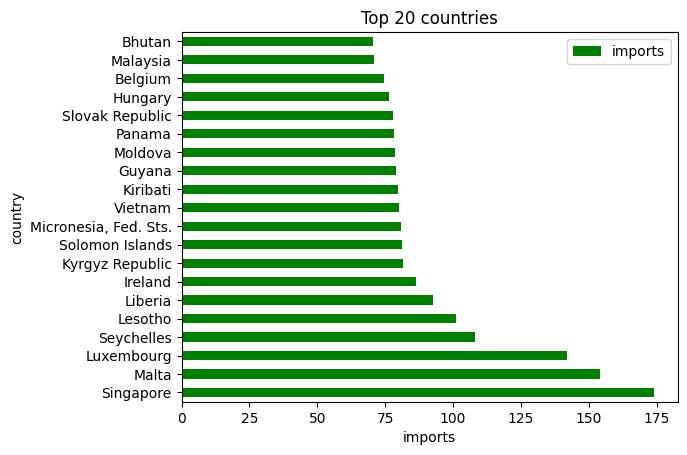

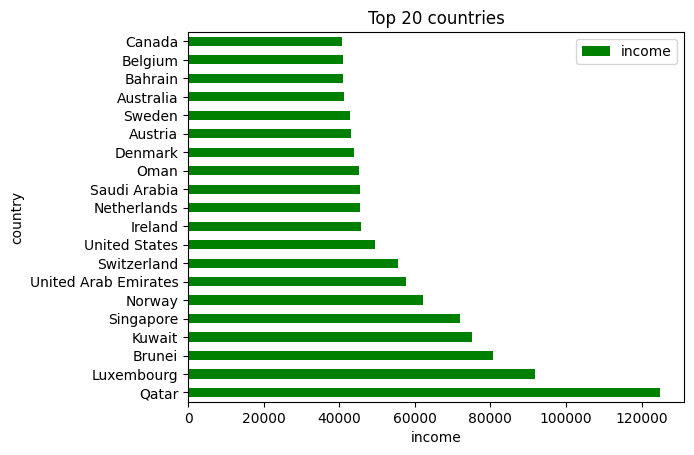

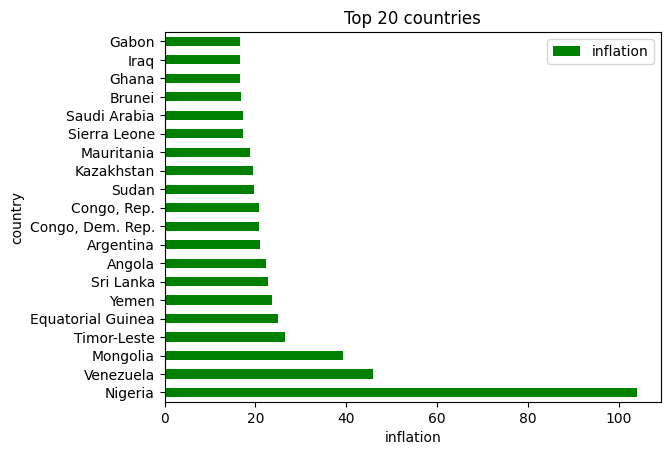

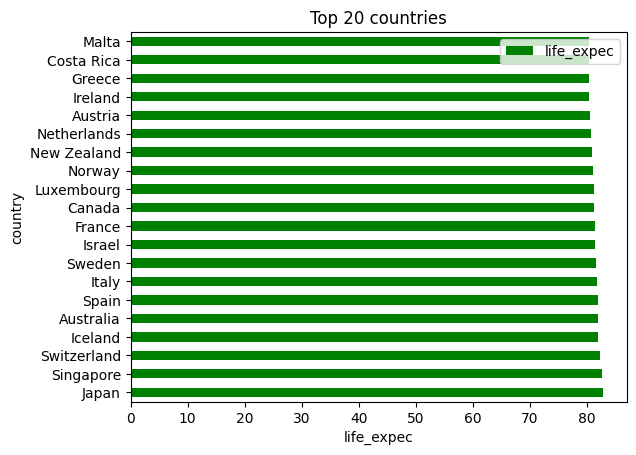

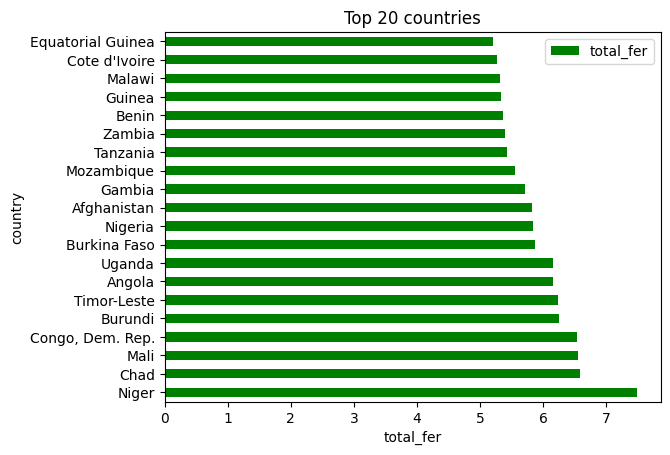

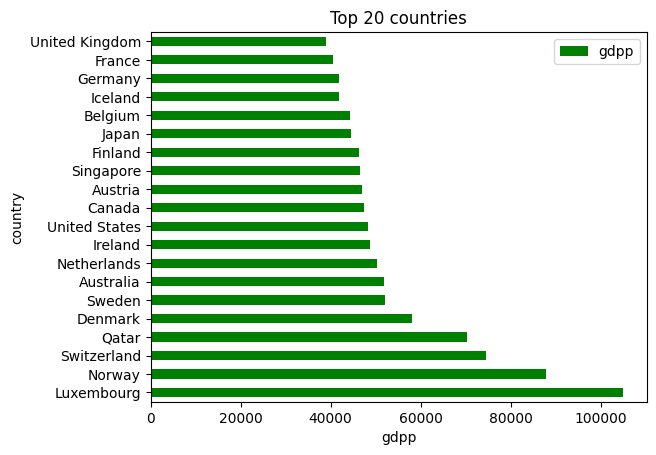

In [75]:
for i in numerical_cols:
    (df[['country',i]].sort_values(i, 
                                          ascending = False).set_index('country').head(20)).plot(kind = 'barh', color = 'green')
    plt.title('Top 20 countries')
    plt.xlabel(i)
    plt.show()


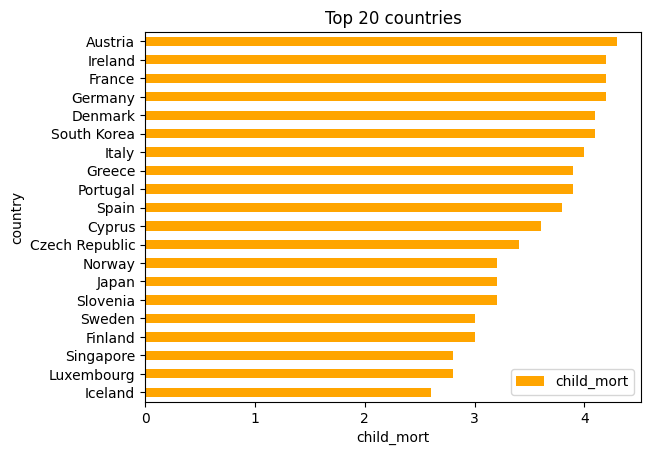

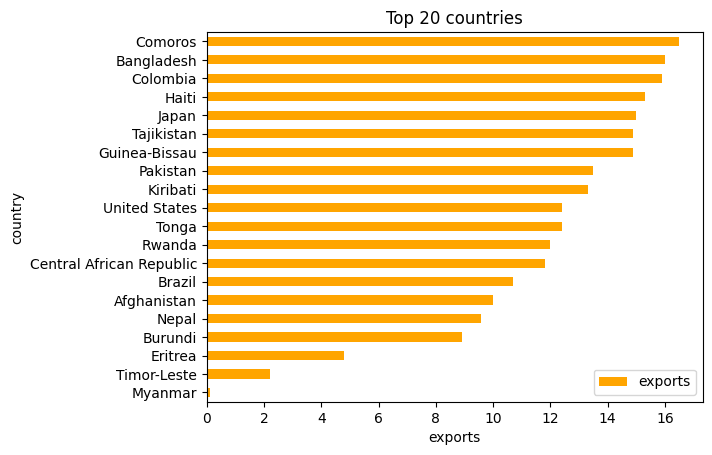

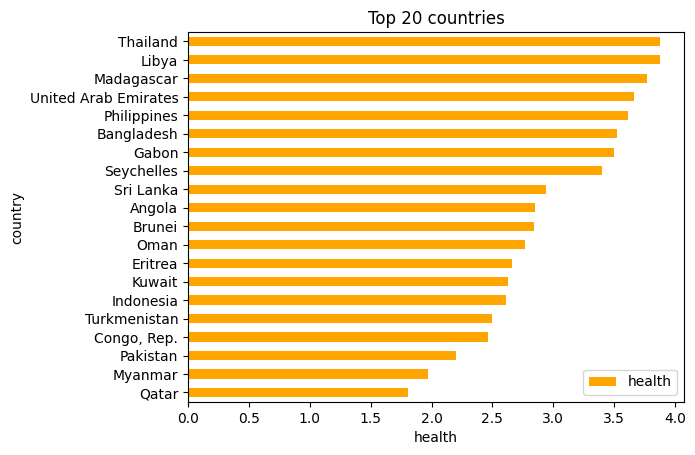

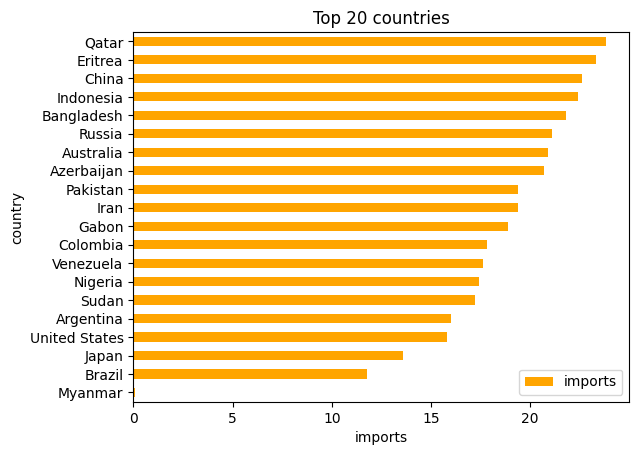

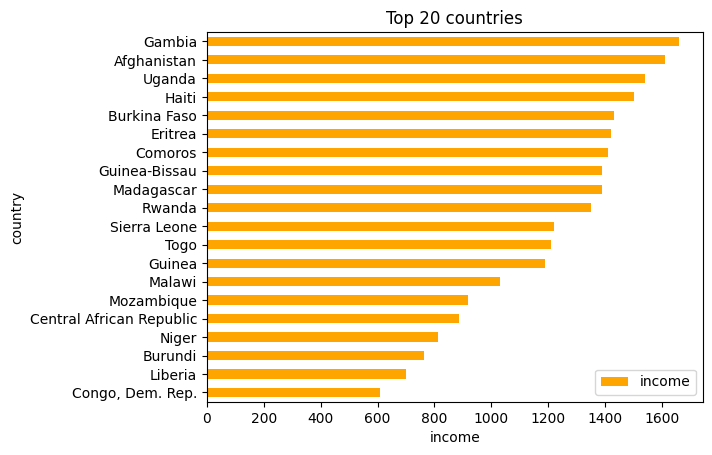

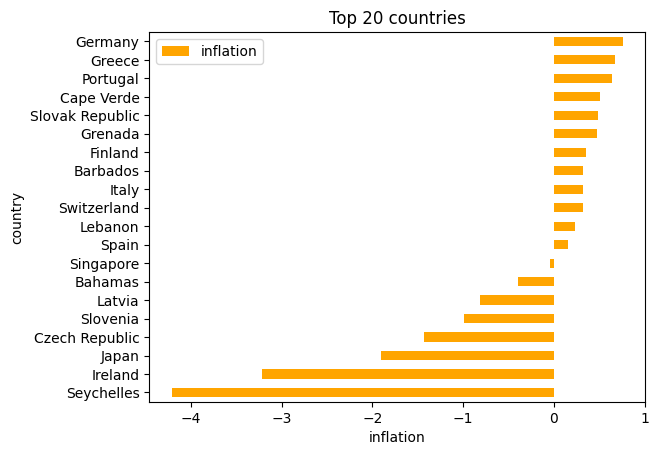

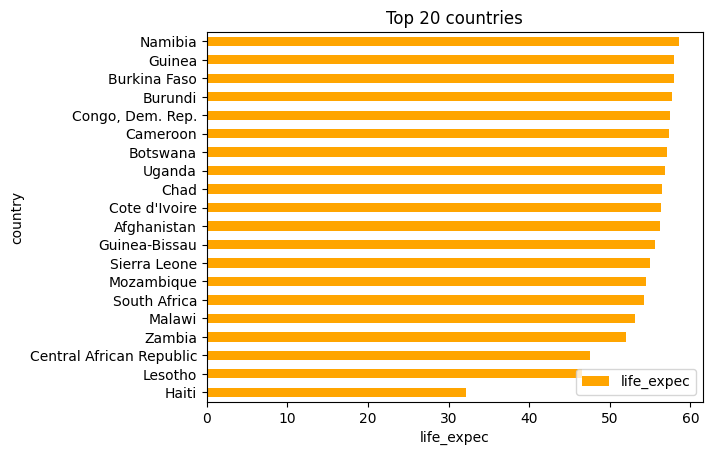

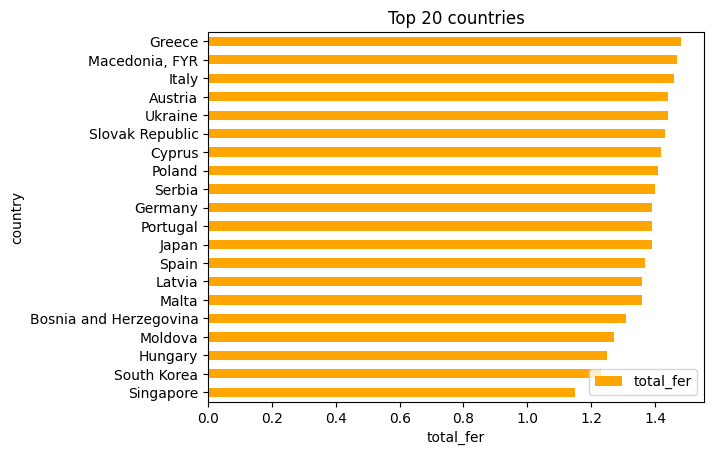

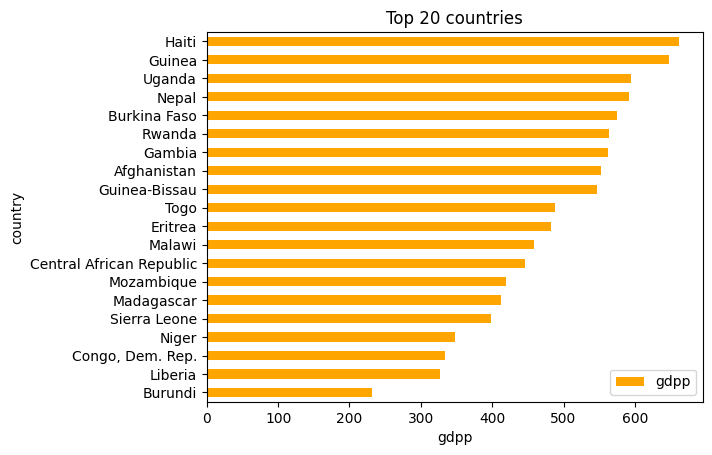

In [80]:
for i in numerical_cols:
    (df[['country',i]].sort_values(i, 
                                          ascending = True).set_index('country').head(20)).plot(kind = 'barh', color = 'orange')
    plt.title('Top 20 countries')
    plt.xlabel(i)
    plt.show()

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [207]:
X = df[numerical_cols]
X_scaled = scaler.fit_transform(X)

In [213]:
pca = PCA(n_components=0.95)

In [214]:
pca_data = pca.fit_transform(X_scaled)

In [215]:
pca_data.shape

(167, 6)

In [216]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876]])

In [212]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626])

In [218]:
pca_data

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
        -0.25459744],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732,
         0.08457863],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465,
        -0.4016955 ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, -1.07409791,  1.17608067,
         0.05160677],
       [-1.88745106, -0.10945301,  1.10975159,  0.05625677,  0.61836532,
        -0.54091719],
       [-2.86406392,  0.48599799,  0.22316658,  0.81636436, -0.27406773,
         0.20137816]])

In [177]:
from sklearn.cluster import KMeans

In [178]:
intertia = []
n_clusters = [2,3,4,5,6,7,8,9,10]
for i in n_clusters:
    kmeans = KMeans(n_clusters=i,n_init='auto', random_state=42)
    kmeans.fit(pca_data)
    intertia.append(kmeans.inertia_)



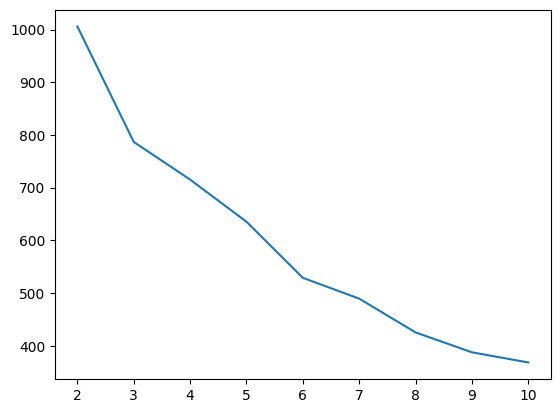

In [179]:
plt.plot(n_clusters, intertia)
plt.show()

In [163]:
X_scaled.shape

(167, 9)

In [219]:
scaled_df_pca = pd.DataFrame(pca_data)

In [220]:
kmeans = KMeans(n_clusters=4)
k_t = kmeans.fit(pca_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [221]:
cluster_pred = k_t.fit_predict(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [291]:
k_t.cluster_centers_

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.41982697,  0.00664849, -0.21172363,  0.04758146, -0.21727424,
        -0.03495325,  0.26841956, -0.43822217, -0.33080531],
       [-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

In [222]:
scaled_df_pca['cluster'] = cluster_pred

In [225]:
array_df_pca = np.array(scaled_df_pca)
array_df_pca

array([[-2.91302459,  0.09562058, -0.7181185 , ..., -0.15831004,
        -0.25459744,  0.        ],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.17467732,
         0.08457863,  1.        ],
       [-0.28522508, -0.45517441,  1.22150481, ...,  0.15647465,
        -0.4016955 ,  1.        ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ...,  1.17608067,
         0.05160677,  1.        ],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.61836532,
        -0.54091719,  0.        ],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.27406773,
         0.20137816,  0.        ]])

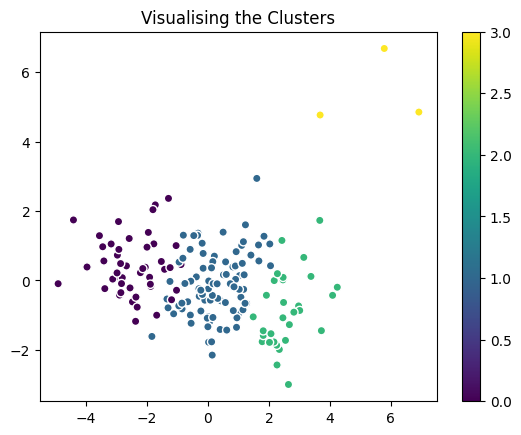

In [290]:
plt.scatter(array_df_pca[:,0],array_df_pca[:,1], c=array_df_pca[:,6],
           edgecolor = 'white')
plt.title('Visualising the Clusters')
plt.colorbar()
plt.show()

In [234]:
df['clusters'] = cluster_pred

In [242]:
cluster_0 = df[df.clusters == 0]
cluster_1 = df[df.clusters == 1]
cluster_2 = df[df.clusters == 2]
cluster_3 = df[df.clusters == 3]

In [264]:
clusters_summary = pd.concat([cluster_0.describe().loc['mean'],cluster_1.describe().loc['mean'],
          cluster_2.describe().loc['mean'], cluster_3.describe().loc['mean']], axis =1)

In [266]:
clusters_summary.columns = [f'Cluster_{i}' for i in range(4)]

In [273]:
transpose_cs = clusters_summary.T.drop('clusters',axis=1)
transpose_cs

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
Cluster_1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
Cluster_2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
Cluster_3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [286]:
from sklearn.preprocessing import MinMaxScaler

In [287]:
scaler_s = MinMaxScaler()
scaler_s = scaler.fit_transform(transpose_cs)

In [288]:
scaled_s = (pd.DataFrame(scaler_s.T)).set_index(transpose_cs.columns)
scaled_s.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

<Axes: >

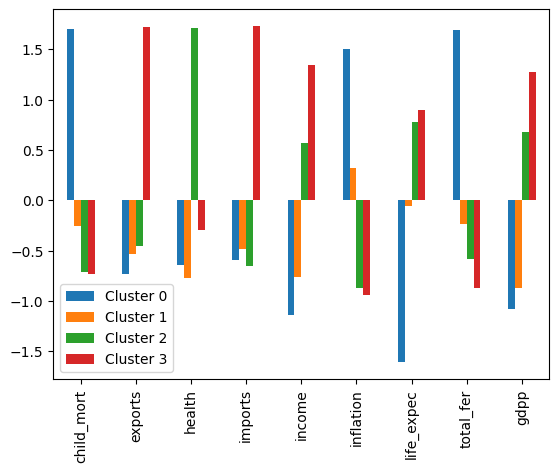

In [289]:
scaled_s.plot(kind='bar')


### Cluster 0  -----> Under Developed Countries
### Cluster 1  -----> Developing Countries
### Cluster 2  -----> Developed Countries
### Cluster 3  -----> Very Developed Countries